## Preamble



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["text.usetex"] = True
import pandas as pd
import numpy as np
from getdist import plots, MCSamples
from IPython.display import HTML, display
import tabulate

## Plot cosmological parameters distribution



### Cosmo. parameters LaTeX labels



In [2]:
labels = [r"$\theta_\mathrm{MC}$",
          r"$\log(10^{10}A_\mathrm{s})$",
          r"$n_\mathrm{s}$",
          r"$\Omega_\mathrm{b}h^2$",
          r"$\Omega_\mathrm{c}h^2$",
          r"$A_\mathrm{s}$",
          r"$\chi^2-\chi^2_\mathrm{min}$"]

### Get cosmo. parameters from output file



In [1]:
def get_params(path, pattern="*.likelihood", weight=False):
    import os, glob
    all_files = glob.glob(os.path.join(path, pattern))
    # Sort alphabetically
    all_files.sort()

    header = pd.read_csv(all_files[0], delim_whitespace=True).columns[1:]
    df = pd.concat((pd.read_table(f, delim_whitespace=True) for f in all_files))

    # Remove '#' in header
    df.drop(df.columns[[-1,]], axis=1, inplace=True)
    df.columns = header
    df.insert(value=df.chi2-np.min(df.chi2), column="delta_chi2", loc=8)
    params = np.array(df.iloc[:, 2:9])
    if weight:
      params = (params, np.array(df.iloc[:, 0]))
    return params

### Show input values of cosmo. parameters



In [1]:
ref = [1.04164/100, np.exp(3.058)/1e10, 0.9649, 0.02212, 0.1210]
def show_ref(g):
    for i, r in enumerate(ref):
        kwargs = dict(color="gray", ls="--", lw=1)
        for ax in g.subplots[:,i]:
            if ax: ax.axvline(r, **kwargs)
        for ax in g.subplots[i,:i]:
            if ax: ax.axhline(r, **kwargs)

### Results from pure Planck simulation



#### Cosmo. parameters distribution



In [1]:
params = get_params(r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/unbinned")
samples = MCSamples(samples=params, names=labels)

# Out[6]:

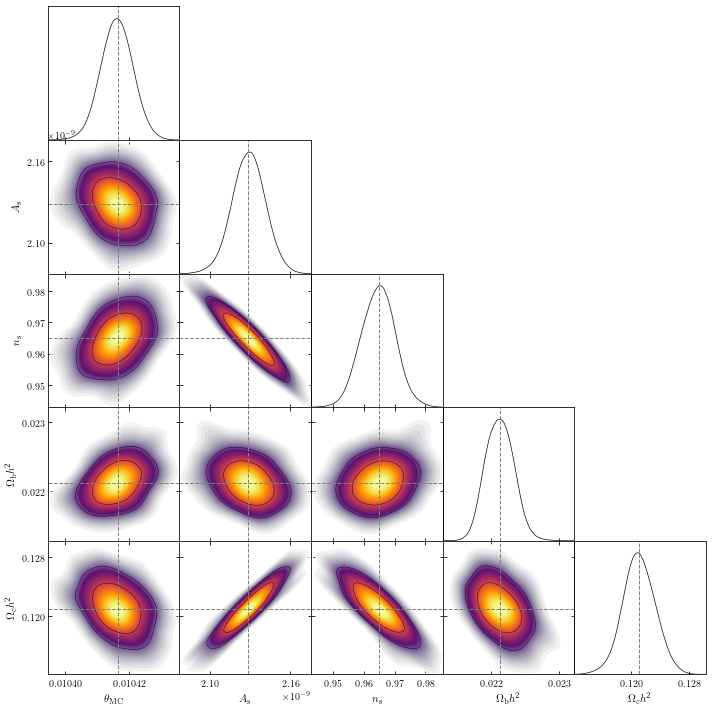

In [1]:
g = plots.getSubplotPlotter()
g.settings.colormap = "inferno"
g.triangle_plot(samples, params=labels[:-1], shaded=True)
show_ref(g)

# Out[7]:

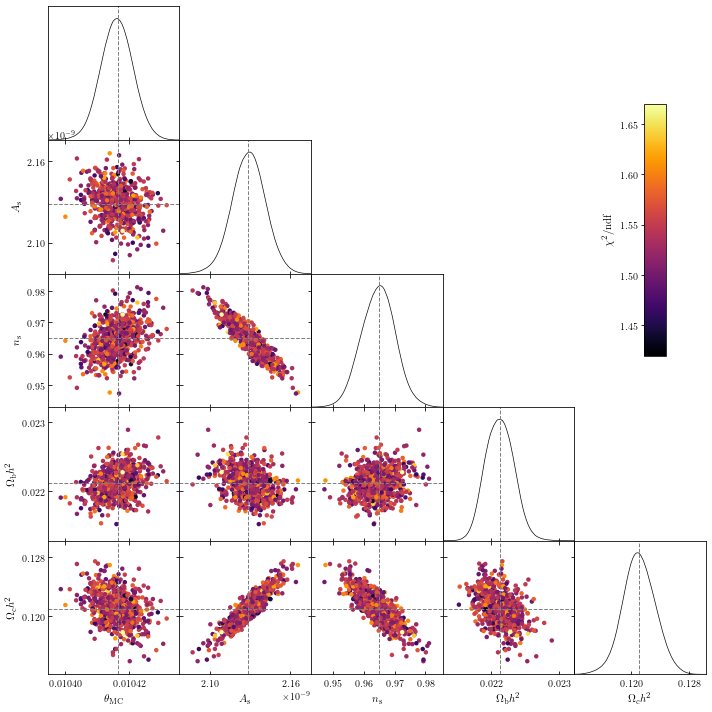

In [1]:
g = plots.getSubplotPlotter()
g.settings.colormap_scatter = "inferno"
g.triangle_plot(samples, params=labels[:-1],
                plot_3d_with_param="$\chi^2/\mathrm{ndf}$", scatter_size=20)
show_ref(g)

In [1]:
print("Number of sucessful minimization :", np.alen(params))

Number of sucessful minimization : 638

In [1]:
min_mean = np.mean(params, axis=0)
min_std  = np.std(params, axis=0)
fisher = np.array([5.1265507267143515e-06, 1.2854648947626772e-11, 0.005589724100405197, 0.00020382255228959767, 0.002334040314343261, 1.])
lines = [[r"$\mu$"], [r"$\sigma$"], [r"$\sigma$ (Fisher)"], [r"$\Delta\sigma$ (min-Fisher) [%]"]]
table = np.stack([min_mean, min_std, fisher, 100*(min_std-fisher)/fisher])
table = np.append(lines, table, axis=1)

In [1]:
display(HTML(tabulate.tabulate(table, headers=labels, tablefmt="html")))

# Out[17]:
<IPython.core.display.HTML object>

## Simons Observatory ⊗ Planck



### \ell \in [2; 3000]



In [1]:
params_SO   = get_params(r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/ell_2_3000", "*SO.likelihood")
params_SOxP = get_params(r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/ell_2_3000", "*SOxP.likelihood")
params_P    = get_params(r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/ell_2_3000", "*_P.likelihood")
params_SO.shape, params_SOxP.shape, params_P.shape

# Out[218]:
((978, 6), (978, 6), (978, 6))

In [1]:
samples_SO   = MCSamples(samples=params_SO, names=labels, label="SOxSO")
samples_SOxP = MCSamples(samples=params_SOxP, names=labels, label="SOxP")
samples_P    = MCSamples(samples=params_P, names=labels, label="PxP")

In [1]:
lines = [[r"$\mu$(SOxSO)"], [r"$\mu$(SOxP)"], [r"$\mu$(PxP)"],
         [r"$\sigma$(SOxSO)"], [r"$\sigma$(SOxP)"], [r"$\sigma$(PxP)"],
         [r"$\sigma$(SOxSO - PxP)"], [r"$\sigma$(SOxSO - SOxP)"], [r"$\sigma$(SOxSO + PxP - 2 SOxP)"]]
std_SO, std_SOxP, std_P = np.std(params_SO, axis=0), np.std(params_SOxP, axis=0), np.std(params_P, axis=0)
std_SOmP = np.std(params_SO-params_P, axis=0)
std_SOmSOxP = np.std(params_SO-params_SOxP, axis=0)
std_SOpPm2SOxP = np.std(params_SO + params_P - 2*params_SOxP, axis=0)
table = np.stack([np.mean(params_SO, axis=0),
                  np.mean(params_SOxP, axis=0),
                  np.mean(params_P, axis=0),
                  std_SO, std_SOxP, std_P,
                  std_SOmP, std_SOmSOxP, std_SOpPm2SOxP
])
table = np.append(lines, table, axis=1)
display(HTML(tabulate.tabulate(table, headers=labels, tablefmt="html")))

Set PxP deviation as standard for further comparison



In [1]:
ref_std = std_P

# Out[230]:

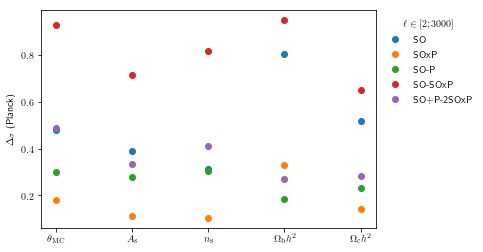

In [1]:
x = np.arange(5)
plt.plot(x, (ref_std/std_SO-1)[:-1], "o", label="SO")
plt.plot(x, (ref_std/std_SOxP-1)[:-1], "o", label="SOxP")
plt.plot(x, (ref_std/std_SOmP-1)[:-1], "o", label="SO-P")
plt.plot(x, (ref_std/std_SOmSOxP-1)[:-1], "o", label="SO-SOxP")
plt.plot(x, (ref_std/std_SOpPm2SOxP-1)[:-1], "o", label="SO+P-2SOxP")
plt.xticks(x, labels[:-1])
plt.ylabel(r"$\Delta_\sigma$ (Planck)")
plt.legend(loc="upper left", title=r"$\ell\in[2; 3000]$", bbox_to_anchor=(1,1))

### \ell \in [50; 2000]



In [1]:
params_SO   = get_params(r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/ell_50_2000", "*SO.likelihood")
params_SOxP = get_params(r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/ell_50_2000", "*SOxP.likelihood")
params_P    = get_params(r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/ell_50_2000", "*_P.likelihood")
params_SO.shape, params_SOxP.shape, params_P.shape

# Out[232]:
((971, 6), (971, 6), (971, 6))

In [1]:
samples_SO   = MCSamples(samples=params_SO, names=labels, label="SOxSO")
samples_SOxP = MCSamples(samples=params_SOxP, names=labels, label="SOxP")
samples_P    = MCSamples(samples=params_P, names=labels, label="PxP")

# Out[178]:

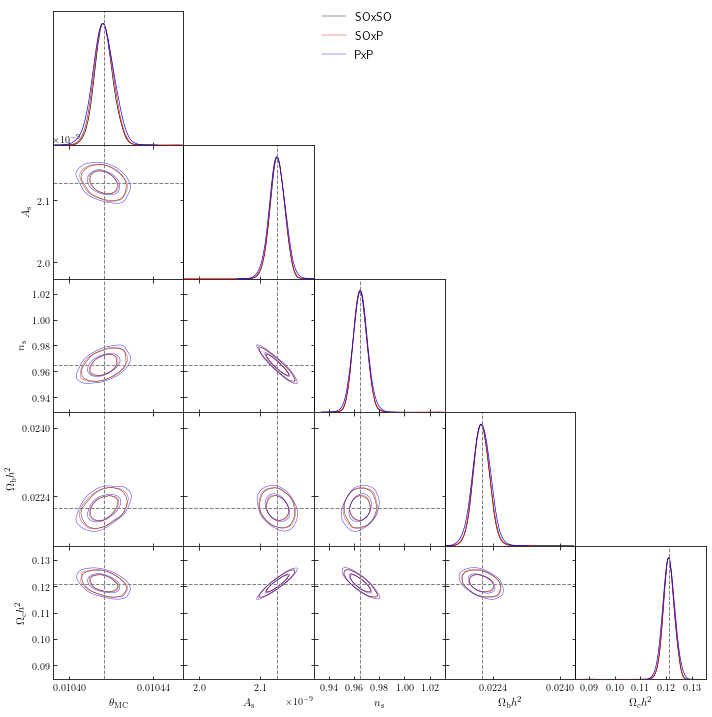

In [1]:
g = plots.getSubplotPlotter()
g.triangle_plot([samples_SO, samples_SOxP, samples_P], params=labels[:-1])
show_ref(g)

In [1]:
lines = [[r"$\mu$(SOxSO)"], [r"$\mu$(SOxP)"], [r"$\mu$(PxP)"],
         [r"$\sigma$(SOxSO)"], [r"$\sigma$(SOxP)"], [r"$\sigma$(PxP)"],
         [r"$\sigma$(SOxSO - PxP)"], [r"$\sigma$(SOxSO - SOxP)"], [r"$\sigma$(SOxSO + PxP - 2 SOxP)"]]
std_SO, std_SOxP, std_P = np.std(params_SO, axis=0), np.std(params_SOxP, axis=0), np.std(params_P, axis=0)
std_SOmP = np.std(params_SO-params_P, axis=0)
std_SOmSOxP = np.std(params_SO-params_SOxP, axis=0)
std_SOpPm2SOxP = np.std(params_SO + params_P - 2*params_SOxP, axis=0)
table = np.stack([np.mean(params_SO, axis=0),
                  np.mean(params_SOxP, axis=0),
                  np.mean(params_P, axis=0),
                  std_SO, std_SOxP, std_P,
                  std_SOmP, std_SOmSOxP, std_SOpPm2SOxP
])
table = np.append(lines, table, axis=1)
display(HTML(tabulate.tabulate(table, headers=labels, tablefmt="html")))

# Out[234]:

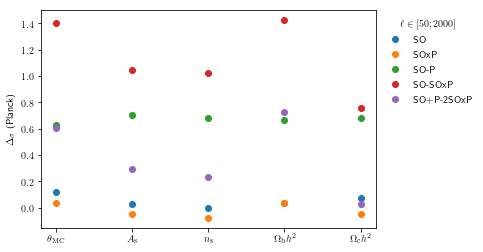

In [1]:
x = np.arange(5)
plt.plot(x, (ref_std/std_SO-1)[:-1], "o", label="SO")
plt.plot(x, (ref_std/std_SOxP-1)[:-1], "o", label="SOxP")
plt.plot(x, (ref_std/std_SOmP-1)[:-1], "o", label="SO-P")
plt.plot(x, (ref_std/std_SOmSOxP-1)[:-1], "o", label="SO-SOxP")
plt.plot(x, (ref_std/std_SOpPm2SOxP-1)[:-1], "o", label="SO+P-2SOxP")
plt.xticks(x, labels[:-1])
plt.ylabel(r"$\Delta_\sigma$ (Planck)")
plt.legend(loc="upper left", title=r"$\ell\in[50; 2000]$", bbox_to_anchor=(1,1))

### \ell \in [50; 1500]



In [1]:
params_SO   = get_params(r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/ell_50_1500", "*SO.likelihood")
params_SOxP = get_params(r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/ell_50_1500", "*SOxP.likelihood")
params_P    = get_params(r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/ell_50_1500", "*_P.likelihood")
params_SO.shape, params_SOxP.shape, params_P.shape

# Out[237]:
((1001, 6), (1001, 6), (1001, 6))

In [1]:
samples_SO   = MCSamples(samples=params_SO, names=labels, label="SOxSO")
samples_SOxP = MCSamples(samples=params_SOxP, names=labels, label="SOxP")
samples_P    = MCSamples(samples=params_P, names=labels, label="PxP")

# Out[206]:

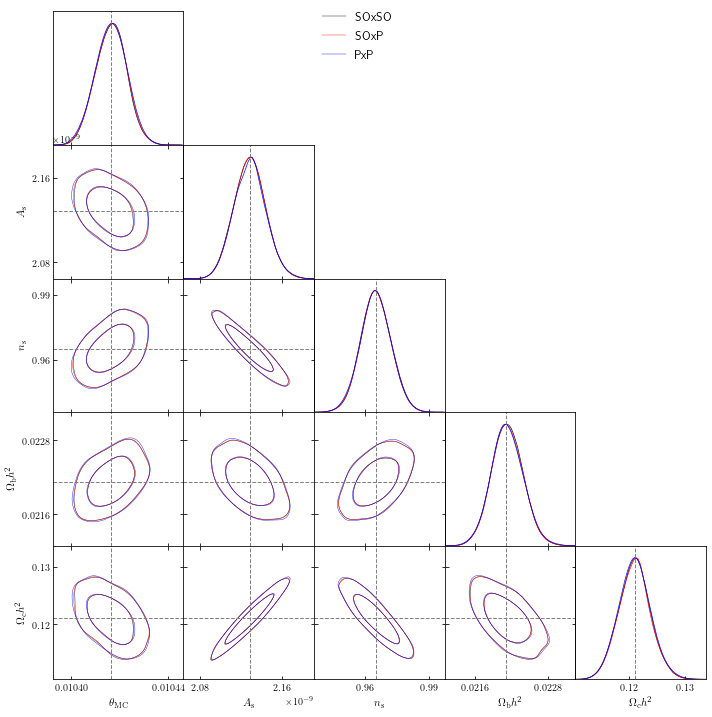

In [1]:
g = plots.getSubplotPlotter()
g.triangle_plot([samples_SO, samples_SOxP, samples_P], params=labels[:-1])
show_ref(g)

In [1]:
lines = [[r"$\mu$(SOxSO)"], [r"$\mu$(SOxP)"], [r"$\mu$(PxP)"],
         [r"$\sigma$(SOxSO)"], [r"$\sigma$(SOxP)"], [r"$\sigma$(PxP)"],
         [r"$\sigma$(SOxSO - PxP)"], [r"$\sigma$(SOxSO - SOxP)"], [r"$\sigma$(SOxSO + PxP - 2 SOxP)"]]
std_SO, std_SOxP, std_P = np.std(params_SO, axis=0), np.std(params_SOxP, axis=0), np.std(params_P, axis=0)
std_SOmP = np.std(params_SO-params_P, axis=0)
std_SOmSOxP = np.std(params_SO-params_SOxP, axis=0)
std_SOpPm2SOxP = np.std(params_SO + params_P - 2*params_SOxP, axis=0)
table = np.stack([np.mean(params_SO, axis=0),
                  np.mean(params_SOxP, axis=0),
                  np.mean(params_P, axis=0),
                  std_SO, std_SOxP, std_P,
                  std_SOmP, std_SOmSOxP, std_SOpPm2SOxP
])
table = np.append(lines, table, axis=1)
display(HTML(tabulate.tabulate(table, headers=labels, tablefmt="html")))

# Out[239]:

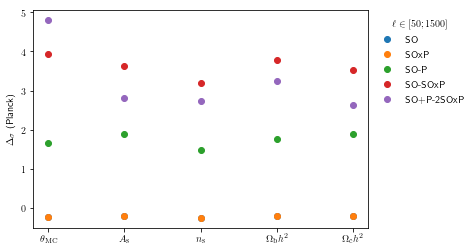

In [1]:
x = np.arange(5)
plt.plot(x, (ref_std/std_SO-1)[:-1], "o", label="SO")
plt.plot(x, (ref_std/std_SOxP-1)[:-1], "o", label="SOxP")
plt.plot(x, (ref_std/std_SOmP-1)[:-1], "o", label="SO-P")
plt.plot(x, (ref_std/std_SOmSOxP-1)[:-1], "o", label="SO-SOxP")
plt.plot(x, (ref_std/std_SOpPm2SOxP-1)[:-1], "o", label="SO+P-2SOxP")
plt.xticks(x, labels[:-1])
plt.ylabel(r"$\Delta_\sigma$ (Planck)")
plt.legend(loc="upper left", title=r"$\ell\in[50; 1500]$", bbox_to_anchor=(1,1))

## MCMC analysis



### Check chains



In [3]:
def get_chains(path, pattern="*.txt"):
    import os, glob
    all_files = glob.glob(os.path.join(path, pattern))
    # Sort alphabetically
    all_files.sort()
    chains = {}
    for f in all_files:
        header = pd.read_csv(all_files[0], delim_whitespace=True).columns[1:]
        df = pd.read_table(f, delim_whitespace=True)

        # Remove '#' in header
        df.drop(df.columns[[-1,]], axis=1, inplace=True)
        df.columns = header
        df.insert(value=df.chi2-np.min(df.chi2), column="delta_chi2", loc=8)
        key = f.split("/")[-2]
        # key = key.split("_")[1:2]
        chains[key] = df
    return chains

In [4]:
def plot_chains(pattern, burnin=0):
    chains = get_chains(r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/mcmc", pattern=pattern)
    plt.figure(figsize=(18, 10))
    for j in range(2,9):
        plt.subplot(2, 4, j-1)
        plt.ylabel(labels[j-2])
        for name, chain in chains.items():
            n = np.arange(len(chain))
            plt.plot(n[burnin:], chain.iloc[:,j][burnin:], alpha=0.75)
    plt.subplots_adjust(hspace=0.25, wspace=0.3)
    plt.legend([k.replace("_", "\_") for k in chains.keys()], loc="upper left", bbox_to_anchor=(1,1))

#### SOxSO - PxP



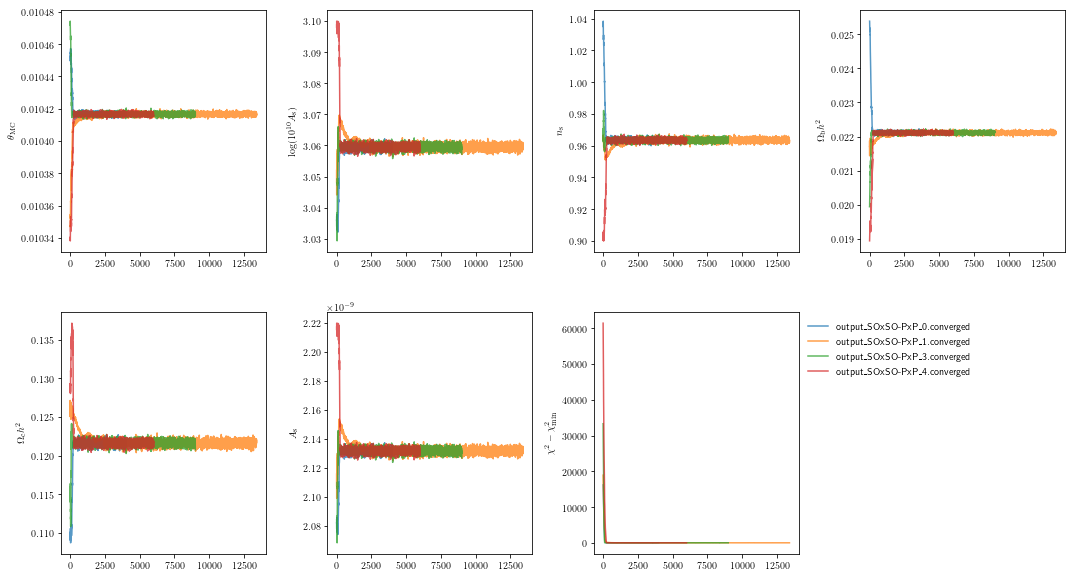

In [5]:
plot_chains(pattern="output_SOxSO-PxP*/mcmc*.txt", burnin=0)

#### SOxP - PxP



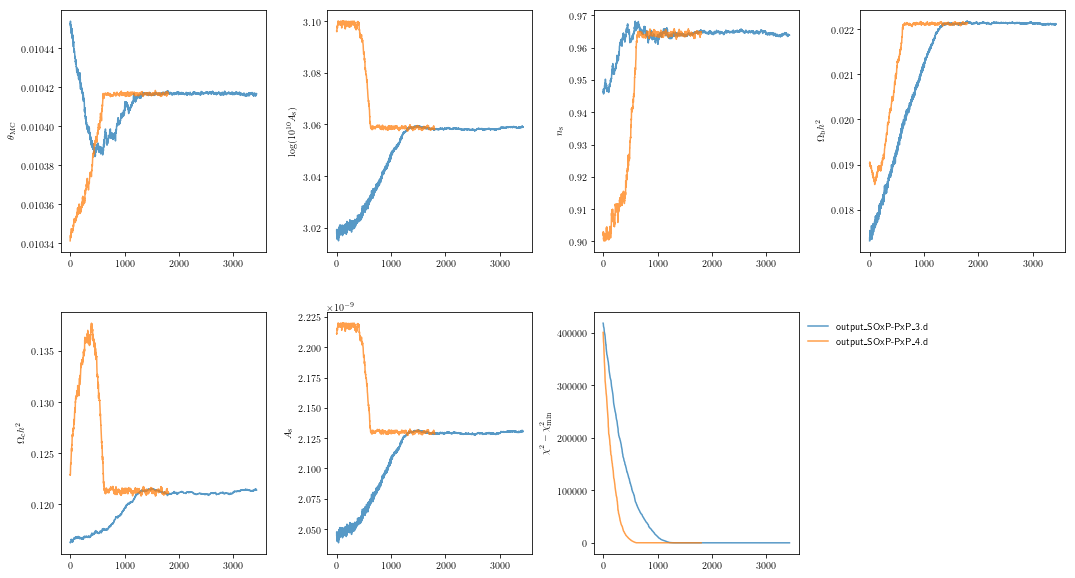

In [6]:
plot_chains(pattern="output_SOxP-PxP*/mcmc*.txt", burnin=0)

#### SOxP - SOxSO



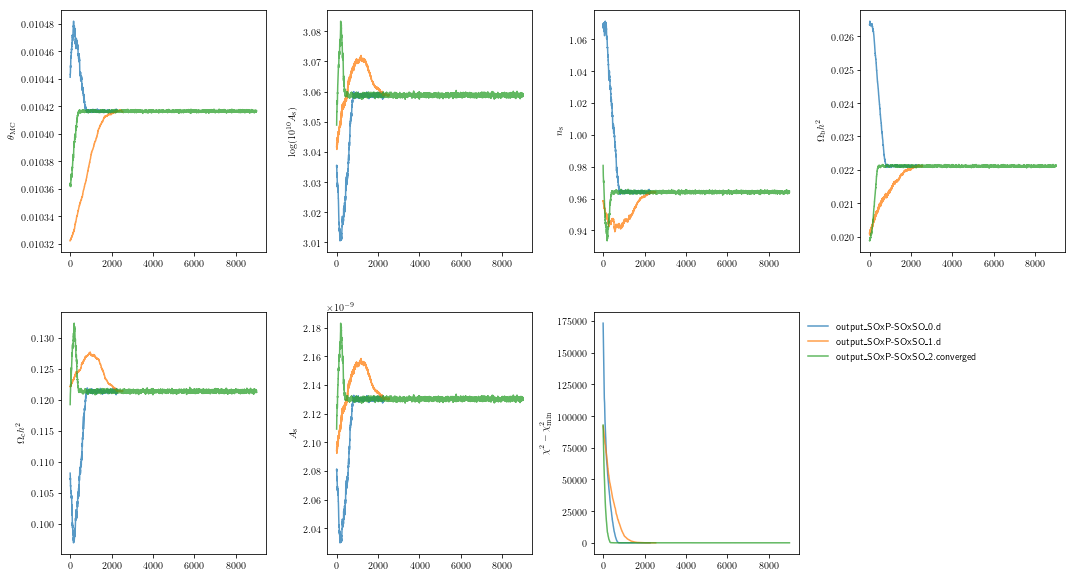

In [7]:
plot_chains(pattern="output_SOxP-SOxSO*/mcmc*.txt", burnin=0)

### Triangle plot



In [8]:
def get_samples(path=r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/mcmc", pattern="*.txt"):
    chains = get_chains(path, pattern)
    key = next(iter(chains))
    samples = chains[key].iloc[:, 2:9].values
    weights = chains[key].iloc[:, 0].values
    return samples, weights

Removed 0.3 as burn in
Removed 0.3 as burn in
Removed 0.3 as burn in
Removed 0.3 as burn in
Removed 0.3 as burn in


/home/garrido/.local/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


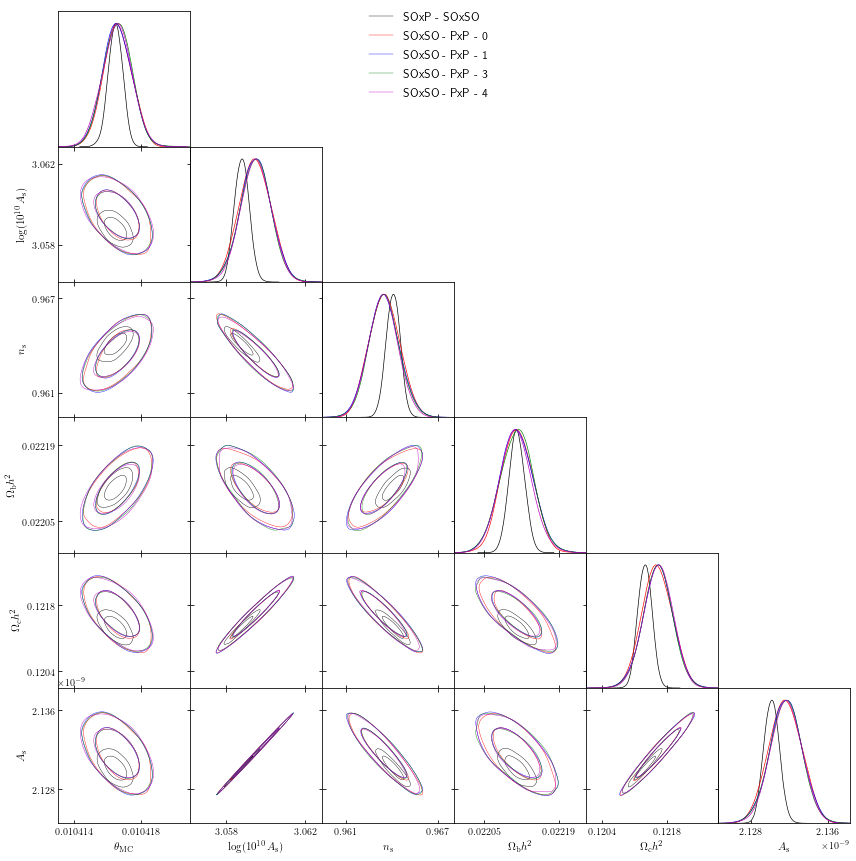

In [12]:
samples = []
s, w = get_samples(pattern="output_SOxP-SOxSO*2.converged/mcmc*.txt")
samples += [MCSamples(samples=s, names=labels, label="SOxP - SOxSO", weights=w, ignore_rows=0.3)]

for i in [0, 1, 3, 4]:
    s, w = get_samples(pattern="output_SOxSO-PxP*{}.converged/mcmc*.txt".format(i))
    samples += [MCSamples(samples=s, names=labels, label="SOxSO - PxP - {}".format(i), weights=w, ignore_rows=0.3)]

g = plots.getSubplotPlotter()
g.triangle_plot(samples, params=labels[:-1])

### Plot variances from MCMC and Hessian



In [10]:
import os, glob
path = r"/home/garrido/Workdir/CMB/analysis/beyondCV/output/mcmc"
surveys = ["SOxSO-PxP", "SOxP-PxP", "SOxP-SOxSO"]
pattern = "output_{}"
headers = labels[:-1]
headers.pop(1)

'$\\log(10^{10}A_\\mathrm{s})$'

#### Compute standard deviation from MCMC



In [13]:
table = []
lines = []
for survey in surveys:
    files = glob.glob(os.path.join(path, pattern.format(survey) + "*converged"))
    if not files:
        continue
    files.sort()
    for f in files:
        samples, weights = get_samples(path=f, pattern="mcmc*.txt")
        mcsamples = MCSamples(samples=samples, names=labels, weights=weights, ignore_rows=0.3)
        sigmas = np.sqrt(mcsamples.getVars()).tolist()
        sigmas.pop(1); sigmas.pop(-1)
        table += [sigmas]
        lines += [[f.split("/")[-1]]]
table = np.append(lines, table, axis=1)
display(HTML(tabulate.tabulate(table, headers=headers, tablefmt="html")))

Removed 0.3 as burn in
Removed 0.3 as burn in
Removed 0.3 as burn in
Removed 0.3 as burn in
Removed 0.3 as burn in


,$\theta_\mathrm{MC}$,$n_\mathrm{s}$,$\Omega_\mathrm{b}h^2$,$\Omega_\mathrm{c}h^2$,$A_\mathrm{s}$
output_SOxSO-PxP_0.converged,8.42204e-07,0.000987998,2.94139e-05,0.00032552,1.69715e-12
output_SOxSO-PxP_1.converged,8.62444e-07,0.00100539,3.13933e-05,0.000324094,1.68814e-12
output_SOxSO-PxP_3.converged,8.60141e-07,0.000979011,3.14452e-05,0.000316173,1.66227e-12
output_SOxSO-PxP_4.converged,8.86752e-07,0.00095145,3.02972e-05,0.000314076,1.62794e-12
output_SOxP-SOxSO_2.converged,4.37106e-07,0.00046037,1.4894e-05,0.000152093,7.95761e-13


#### From Hessian



In [14]:
import pickle
def get_hessians(path, pattern="/*.pkl"):
    import os, glob
    all_files = glob.glob(os.path.join(path, pattern))
    all_files.sort()
    hessians = {}
    for f in all_files:
        d = pickle.load(open(f, "rb"))
        hess = d["results"]["OptimizeResult"]["hess_inv"]
        hessians[f] = np.sqrt(np.diagonal(hess))
    return hessians

In [15]:
table = []
lines = []
for survey in surveys:
    files = glob.glob(os.path.join(path, pattern.format(survey) + "*converged"))
    if not files:
        continue
    files.sort()
    hessians = get_hessians(path=path, pattern=pattern.format(survey) + "*converged*/minimize*.pkl")
    for k, v in hessians.items():
        table += [v.tolist()]
        lines += [[k.split("/")[-2]]]
table = np.append(lines, table, axis=1)
display(HTML(tabulate.tabulate(table, headers=headers, tablefmt="html")))

,$\theta_\mathrm{MC}$,$n_\mathrm{s}$,$\Omega_\mathrm{b}h^2$,$\Omega_\mathrm{c}h^2$,$A_\mathrm{s}$
output_SOxSO-PxP_0.converged,9.07562e-07,0.000462882,0.000710933,2.45234e-05,0.000173289
output_SOxSO-PxP_1.converged,1.00649e-06,0.00234359,0.000727028,0.000117997,0.000562889
output_SOxSO-PxP_3.converged,1.04358e-06,0.000916334,0.00126595,3.51463e-05,0.000428267
output_SOxSO-PxP_4.converged,1.09634e-06,0.000803228,0.00118938,3.60983e-05,0.000384808
output_SOxP-SOxSO_2.converged,4.68394e-07,0.000332471,0.000446926,7.51214e-06,0.000141894
